In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [163]:
target_idx = 3
summer_idx = 1

In [171]:
class NIOM:
    def __init__(self):
        pass
    def predict(self, X):
        # TODO: Implement Algo C.Combine
        pass

    def std_thr(self, X):
        X["Energy"] = X.Energy.rolling(15).std()
        return self.thr(X)
     
    def average_thr(self, X):
        X["Energy"] = X.Energy.rolling(15).mean()
        return self.thr(X)
    
    def range_thr(self, X):
        X["Energy"] = X.Energy.rolling(15).max()
        X["Energy"] -= X.Energy.rolling(15).min()
        return self.thr(X)

    def thr(self, X):
        preds = []
        for _, ser in X.groupby("Day"):
            energy_night = ser[(ser.Time > 1)&(ser.Time < 8)].Energy
            p_ave = energy_night.max()
            # print(f"p_ave: {p_ave}")

            energy_day = ser[(ser.Time >= 12)&(ser.Time < 44)].Energy
            pred = [1 if x > p_ave else 0 for x in energy_day]
            preds += pred      
        return preds

In [172]:
target_X_all = pd.read_csv(f"./deep_occupancy_detection/data/{target_idx}_X_train_niom.csv")
num_days = int(target_X_all.shape[0]/48)
target_X_all["Day"] = [i for i in range (num_days) for _ in range(48)]

target_X = target_X_all[(target_X_all.Time >= 12)&(target_X_all.Time < 44)]
target_X = target_X.reset_index(drop=True)
target_y_task = pd.read_csv(f"./deep_occupancy_detection/data/{target_idx}_Y_train_niom.csv")[target_X.Season==summer_idx]

target_X_all = target_X_all[target_X_all.Season==summer_idx]

In [173]:
niom = NIOM()
pred_y_ave = niom.average_thr(target_X_all)
pred_y_std = niom.std_thr(target_X_all)
pred_y_range = niom.range_thr(target_X_all)

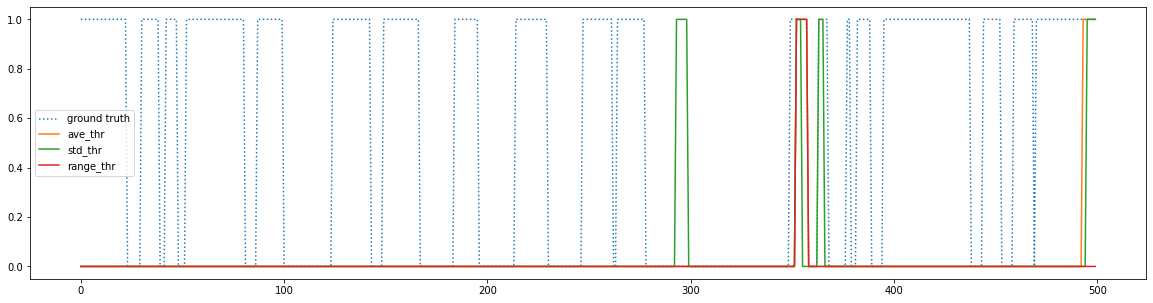

In [181]:
plt.figure(figsize=(20, 5))
plt.plot(target_y_task.reset_index().Occupancy[:500], ":", label="ground truth")
plt.plot(pred_y_ave[:500], label="ave_thr")
plt.plot(pred_y_std[:500], label="std_thr")
plt.plot(pred_y_range[:500], label="range_thr")
plt.legend()